**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

We have made a class for each question in the 3 problem sets. 

In [1]:
from itertools import product
import numpy as np
import sympy as sp
from scipy import optimize
from scipy import interpolate
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')
import seaborn as sns
from IPython.display import display

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:

#Import the LaborSupplyModel class
from ExamQ1 import LaborSupplyModel

model = LaborSupplyModel()

#Display the equation for the optimal labor supply choice
display(model.display_optimal_labor_supply_equation())




Optimal labor supply choice:
              ___________________
             ╱            2      
            ╱  4⋅α⋅w_tilde     2 
    -κ +   ╱   ──────────── + κ  
         ╲╱         ν            
L = ─────────────────────────────
              2⋅w_tilde          


None

Above is verifyed that the optimal labor supply is given by L^*(w^tilde)

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

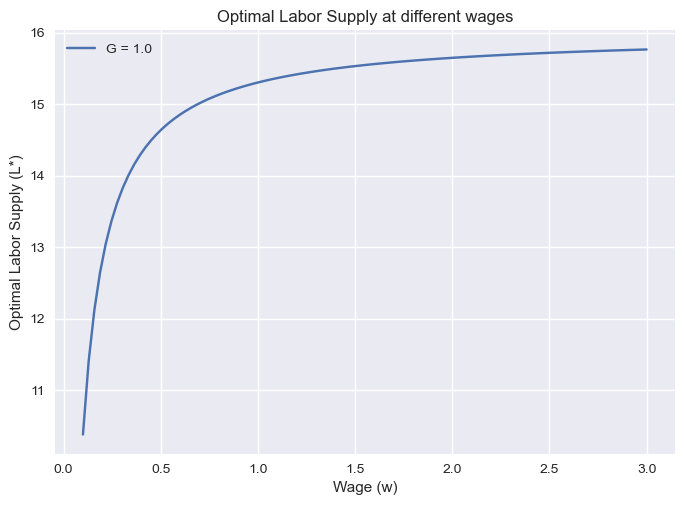

In [3]:
#Import the LaborSupplyGraph class
from ExamQ1 import LaborSupplyGraph

#Define parameters
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16 ** 2)
w = 1.0
tau = 0.30
G_values = [1.0]

model = LaborSupplyGraph(alpha, kappa, nu, tau)

#Create different values for wage
w_values = np.linspace(0.1, 3.0, 100)  

#Plot the optimal labor supply against the wage
model.plot_labor_supply_graph(w_values, G_values)

The above figure shows the optimal labor supply against the wage. As the wage increases the optimal labor supply will increase. When the wage is between 0.5 and 1 the curve of the optimal labor supply will flatten, and as wage increase the optimal labor supply will stay around the same level. 


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/Users/sofiepetersen/Documents/Universitet/8. semester/Python/Projekt 1/projects-2023-frederikke-x2-og-sofie/projects-2023-frederikke-x2-og-sofie/Exam/Exam.py:85: RuntimeWarning: invalid value encountered in true_divide
  return (-self.kappa + np.sqrt(self.kappa**2 + 4 * self.alpha / self.nu * tilde_w**2)) / (2 * tilde_w)
/Users/sofiepetersen/Documents/Universitet/8. semester/Python/Projekt 1/projects-2023-frederikke-x2-og-sofie/projects-2023-frederikke-x2-og-sofie/Exam/Exam.py:97: RuntimeWarning: divide by zero encountered in log
  return np.log(C**self.alpha * (tau * w * L)**(1 - self.alpha)) - self.nu * L**2 / 2


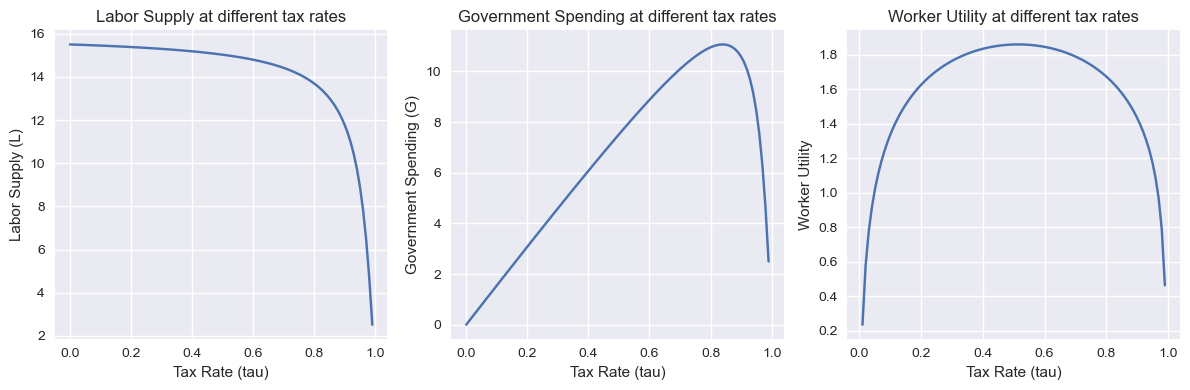

In [4]:
#Import LaborSupplyGraphQ3 class
from ExamQ1 import LaborSupplyGraphQ3

#Define parameters
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16 ** 2)
w = 1.0 

#Create different tau values
tau_values = np.linspace(0, 1, 100)  # Grid of tau values

model = LaborSupplyGraphQ3(alpha, kappa, nu)

#Plotting L,G and worker utility against different values for tau
model.plot_implied_values(w, tau_values)


The graph to the left shows the relationship between labor supply and the tax rate. There is a negative relationship between the two parameters since a higher tax rate makes it less profitable to work. 

The graph in the middle shows the relationship beetween government spending and the tax rate. A higher tax rate has a positive effect on the government consumption when it is not too high. When the tax rate becomes too high there are no incentive to work, which lowers the government consumption. 

The graph to the right shows the relationship between worker utility and the tax rate. The worker gets advantage of a low tax however the incentive to work decreases when the tax rate becomes high. 

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

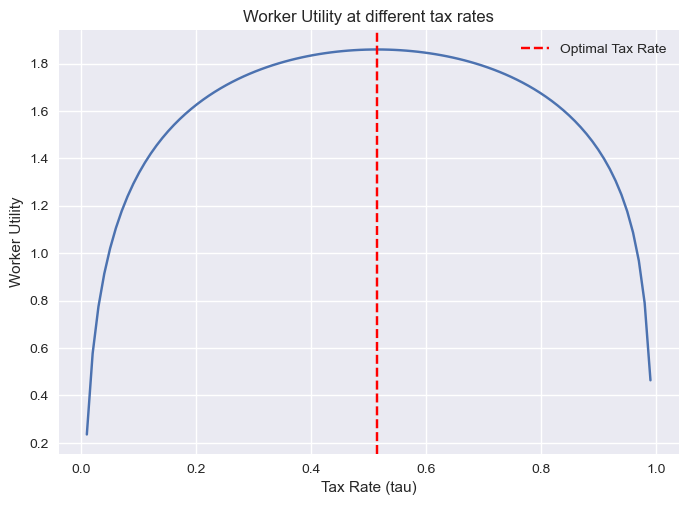

The socially optimal tax rate maximizing worker utility: tau* = 0.5151515151515152
The maximum worker utility: U* = 1.859198522264495


In [5]:
#Import LaborSupplyGraphQ4 class
from ExamQ1 import LaborSupplyGraphQ4

#Define parameters
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16 ** 2)
w = 1.0

#Create values for tau
tau_range = np.linspace(0.0, 1.0, 100)  

model = LaborSupplyGraphQ4(alpha, kappa, nu)

#Plotting the worker utility and find the socially optimal tax rate
model.plot_optimal_tax_rate(w, tau_range)

The graph above shows that the socially optimal tax rate is 0.515. The worker utility will increase until the point where the tax rate is 0.515, after this point the worker utility will decrease.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [17]:

#Import LaborSupplyGraphQ5 class
from ExamQ1 import LaborSupplyGraphQ5

#Define parameters
alpha = 0.5
kappa = 1.0
nu = 1.0/(1*16**2)
sigma = 1.001
rho = 1.001
epsilon = 1.0

w = 1.0
tau = 0.5151515151515152

model = LaborSupplyGraphQ5(alpha, kappa, nu, sigma, rho, epsilon)
optimal_G = model.solve_optimal_G(w, tau)

model = LaborSupplyGraphQ5(alpha, kappa, nu, sigma, rho, epsilon)

#Range of tax rates from 0 to 1
tau_range = np.linspace(0, 1, 100)  

print(f"When sigma = 1.001, rho = 1.001 and epsilon = 1.0 the optimal G for tau = {tau} is: {optimal_G}")


When sigma = 1.001, rho = 1.001 and epsilon = 1.0 the optimal G for tau = 0.5151515151515152 is: 12.36363449087662


In [19]:

#Import LaborSupplyGraphQ5 class
from ExamQ1 import LaborSupplyGraphQ5

#Define parameters
alpha = 0.5
kappa = 1.0
nu = 1.0/(1*16**2)
sigma = 1.5
rho = 1.5
epsilon = 1.0

w = 1.0
tau = 0.5151515151515152

model = LaborSupplyGraphQ5(alpha, kappa, nu, sigma, rho, epsilon)
optimal_G = model.solve_optimal_G(w, tau)

model = LaborSupplyGraphQ5(alpha, kappa, nu, sigma, rho, epsilon)

#Range of tax rates from 0 to 1
tau_range = np.linspace(0, 1, 100)  

print(f"When sigma = 1.5, rho = 1.5 and epsilon = 1.0 the optimal G for tau = {tau} is: {optimal_G}")

When sigma = 1.5, rho = 1.5 and epsilon = 1.0 the optimal G for tau = 0.5151515151515152 is: 11.008814934876403


When sigma and rho is increasing the optimal G is decreasing

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [18]:
#Import LaborSupplyGraphQ6 class
from ExamQ1 import LaborSupplyGraphQ6

#Define parameters
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16 ** 2)
sigma = 1.001
rho = 1.001
epsilon = 1.0

w = 1.0

#Creating tau values
tau_range = np.linspace(0.0, 1.0, 100)  # Grid of tau values

model = LaborSupplyGraphQ6(alpha, kappa, nu, sigma, rho, epsilon)

optimal_tax_rate, optimal_G = model.solve_optimal_tax_rate(w)
print("Optimal Tax Rate:", optimal_tax_rate)
print("Corresponding Optimal G:", optimal_G)

Optimal Tax Rate: 0.731211618408752
Corresponding Optimal G: 0.7758696682236474


In [8]:
#Import LaborSupplyGraphQ6 class
from ExamQ1 import LaborSupplyGraphQ6

#Define parameters
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16 ** 2)
sigma = 1.5
rho = 1.5
epsilon = 1.0

w = 1.0

#Creating tau values
tau_range = np.linspace(0.0, 1.0, 100)  # Grid of tau values

model = LaborSupplyGraphQ6(alpha, kappa, nu, sigma, rho, epsilon)

optimal_tax_rate, optimal_G = model.solve_optimal_tax_rate(w)
print("Optimal Tax Rate:", optimal_tax_rate)
print("Corresponding Optimal G:", optimal_G)


Optimal Tax Rate: 0.39135835051803103
Corresponding Optimal G: 0.4784453380932102


When sigma and rho is increasing the optimal tax value and the optimal G is decreasing.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.



In [21]:
#Import Class
from ExamQ2 import HairSalonQ1

salon = HairSalonQ1(kappa=1.0, eta=0.5, w=1.0)

#Finding the expression for the optimal number of hairdressers l 
optimal_ell_expr = salon.calculate_optimal_ell()

#Creating the equation for the optimal l
equation = sp.Eq(salon.ell, optimal_ell_expr)

#Printing the equation
print("The optimal ell that maximises profit is given by:")
equation

The optimal ell that maximises profit is given by:


Eq(ell, (kappa*(1 - eta)/w)**(1/eta))

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [10]:
#Import Class
from ExamQ2 import HairSalonQ2

#Setting the parameter values
rho = 0.90
eta = 0.5
wage = 1.0
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)

salon = HairSalonQ2(rho, eta, wage, iota, sigma_epsilon, R)

#Finding the expected value of the hair salon H
K = 10000  #Number of shock series to simulate
expected_h = salon.calculate_expected_h(K)

print(f"The expected value of the salon (H) is approximately: {expected_h}")


The expected value of the salon (H) is approximately: 27.730465704480658


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [11]:
#Import Class
from ExamQ2 import HairSalonQ3

#Setting the parameter values
rho = 0.90
eta = 0.5
wage = 1.0
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
delta = 0.05

salon = HairSalonQ3(rho, eta, wage, iota, sigma_epsilon, R, delta)

#Finding the expected value of the hair salon given the new policy
K = 10000  #Number of shock series to simulate
expected_h_new_policy = salon.calculate_expected_h(K)

print(f"The expected value of the salon with the new policy (H) is approximately: {expected_h_new_policy}")


The expected value of the salon with the new policy (H) is approximately: 28.08843052529469


The new policy increases profitability from appox. 27.71 to 28.1 

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

The optimal delta that maximizes H is approximately: 0.06401194001935848
The maximum expected value of the salon (H) is approximately: 28.391673143067838


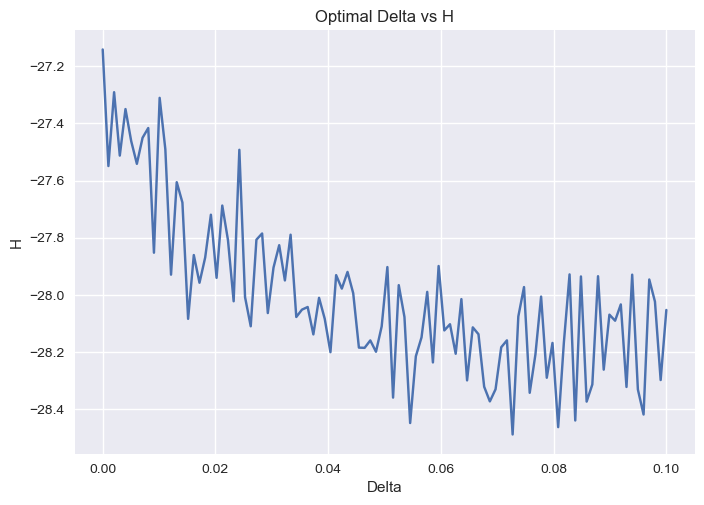

In [12]:
#Import Class
from ExamQ2 import HairSalonoptimalQ4

#Setting the parameter values
rho = 0.90
eta = 0.5
wage = 1.0
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)

salon = HairSalonoptimalQ4(rho, eta, wage, iota, sigma_epsilon, R)

#Setting bounds for optimization for delta
delta_lower_bound = 0.0
delta_upper_bound = 0.1

#Optimizing
optimal_delta, optimal_h = salon.find_optimal_delta(delta_lower_bound, delta_upper_bound)

print(f"The optimal delta that maximizes H is approximately: {optimal_delta}")
print(f"The maximum expected value of the salon (H) is approximately: {optimal_h}")

#Plotting the values of H for different delta values
delta_values = np.linspace(delta_lower_bound, delta_upper_bound, 100)
h_values = []

for delta in delta_values:
    h_value = salon.objective_function(delta)
    h_values.append(h_value)

salon.plot_h_values(delta_values, h_values)


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



An alternative policy that might improve profitability is by using dynamic pricing. When using dynamic pricing the hair salon can adjust prices depending on the demand level, the salon is therefore able to react when there is changes in demand 

We do this by importing a demand data class which generates different random shock series for the demand levels this can be used when calculating the profitability H, because it simulates different scenarios. 

In [13]:
#Import Classes
from ExamQ2 import HairSalonDynamicQ5
from ExamQ2 import DemandDataQ5

#Define the function in order to calculate H
def calculate_H(salon, demand_data):
    R = (1 + 0.01) ** (1/12) #Discount factor
    K = 1000  #Number of random shock series

    total_h = 0.0
    #Loop over the number of shock series
    for k in range(K):
        h = 0.0 
        epsilon_series = demand_data.generate_epsilon_series()  #Generate random shock series
        #Loop over the time periods in the epsilon series 
        for t in range(len(epsilon_series)):
            demand_level = epsilon_series[t] 
            dynamic_price = salon.calculate_dynamic_price(demand_level)

           
            #By accumulating the discounted value of the dynamic price h is updated
            h += R ** (-t) * dynamic_price

        total_h += h

    H = total_h / K #Caculating the average H 
    return H

base_price = 1.0
salon = HairSalonDynamicQ5(base_price)

#Defining variables
num_periods = 120
rho = 0.90
sigma_epsilon = 0.10
demand_data = DemandDataQ5(num_periods, rho, sigma_epsilon)

H = calculate_H(salon, demand_data)

#Print the calculated value of H
print("The expected value of H when using dynamic pricing:", H)

The expected value of H when using dynamic pricing: 109.08261873898013


When implementing dynamic pricing the expected value of H rises to approx 108.8, which is higher then the profitability of question 4. 

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [14]:
def griewank(x):
    return griewank_(x[0],x[1])
    
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

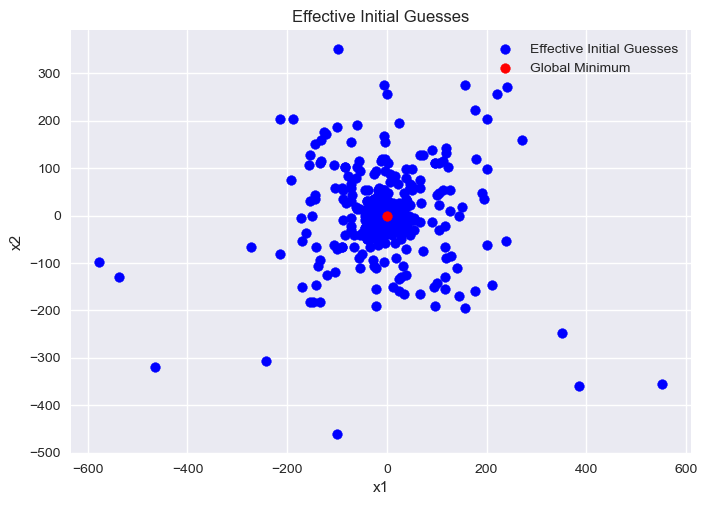

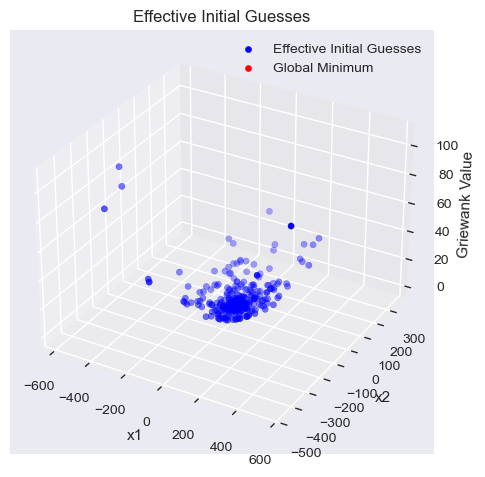

In [15]:
#Import Class
from ExamQ3 import GriewankOptimizer

#We now create an instance of the model with the specified parameters
optimizer = GriewankOptimizer(bounds=[-600, 600], tolerance=1e-8, warmup_iters=10, max_iters=1000)

#We now perform the optimization process
optimizer.optimize()

#We then plot the trajectory of initial guesses and the global minimum
optimizer.plot_initial_guesses_2d()

optimizer.plot_initial_guesses_3d()

The 2D plot shows that the global minima is in (0,0). The minima is located where the density is strongest in the 3D plot. The guesses are plotted around the global minima, however some outliers appear. From the 3D plot it is shown that the guesses are plottet in a convex function around the global minima. 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

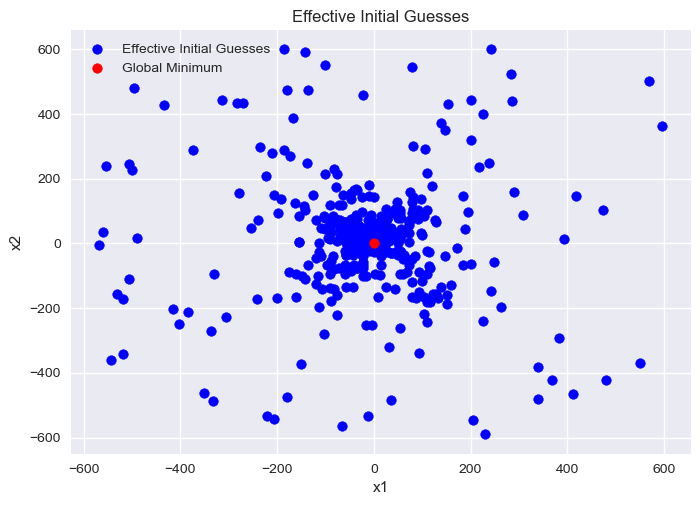

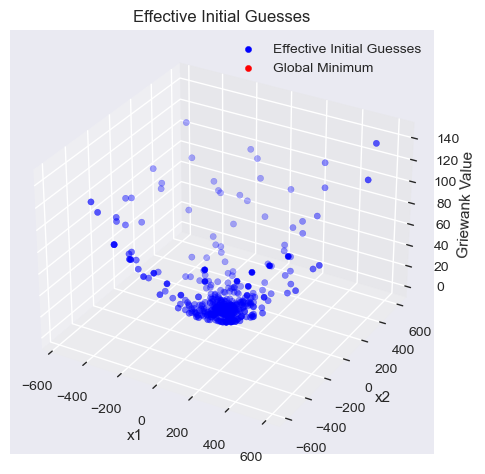

In [16]:
#Import Class
from ExamQ3 import GriewankOptimizer

#We now create an instance of the model with the specified parameters where warmup_iters now equals 100
optimizer = GriewankOptimizer(bounds=[-600, 600], tolerance=1e-8, warmup_iters=100, max_iters=1000)

#We now perform the optimization process
optimizer.optimize()

#We then plot the trajectory of initial guesses and the global minimum
optimizer.plot_initial_guesses_2d()

optimizer.plot_initial_guesses_3d()

When we set the warmup_iters to 100 the guesses are more scattered around the global minima in (0,0). The convergence does not appear faster, because the guesses are more scattered.